In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

In [2]:

PROCESSED_PATH = 'data/heart_processed.csv'
df = pd.read_csv(PROCESSED_PATH)
X = df.drop(columns=['target'])
y = df['target']


thalach        0.098775
cp_4.0         0.088067
ca_0.0         0.083943
oldpeak        0.082411
age            0.079659
thal_3.0       0.078516
chol           0.066523
thal_7.0       0.060455
trestbps       0.055895
exang_0.0      0.041541
exang_1.0      0.038129
slope_2.0      0.028374
slope_1.0      0.027733
sex_0.0        0.021441
cp_3.0         0.020972
sex_1.0        0.019697
ca_1.0         0.016262
ca_2.0         0.014621
restecg_0.0    0.013193
restecg_2.0    0.012623
dtype: float64


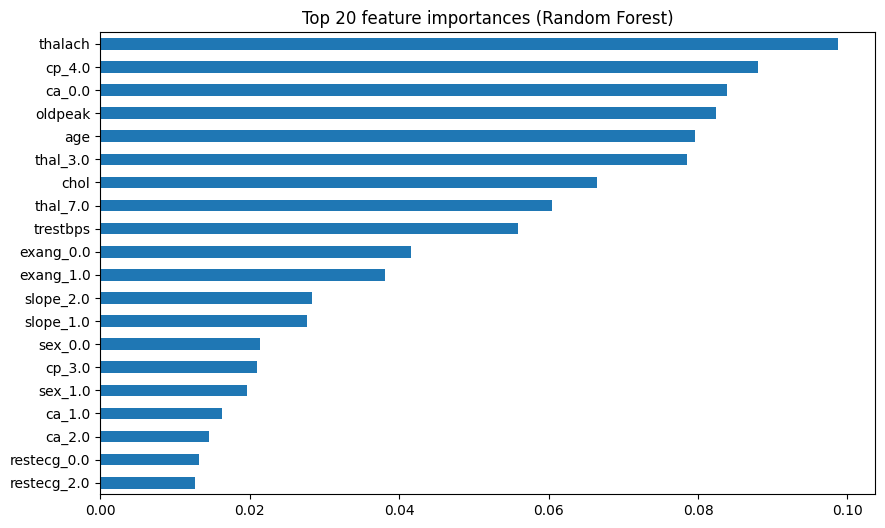

In [3]:


# Random Forest feature importance
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importances.head(20))


plt.figure(figsize=(10,6))
feat_importances.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 feature importances (Random Forest)')
plt.show()


In [4]:


# Recursive Feature Elimination using Logistic Regression (as estimator)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
selector = RFE(lr, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
support = selector.support_
selected_features = X.columns[support]
print('RFE selected features:', selected_features.tolist())



RFE selected features: ['oldpeak', 'sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'ca_0.0', 'thal_7.0']


In [5]:

# Chi-square requires non-negative features; use MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
chi_scores, pvals = chi2(X_scaled, y)
chi_df = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)
print('Top chi2 scores:\n', chi_df.head(20))



Top chi2 scores:
 thal_7.0       42.958360
cp_4.0         42.410097
exang_1.0      38.052613
thal_3.0       36.592219
ca_0.0         28.315601
slope_1.0      24.086540
cp_3.0         21.551109
slope_2.0      20.624160
ca_2.0         19.509795
exang_0.0      18.466709
sex_0.0        15.785218
cp_2.0         15.646367
ca_1.0         12.461167
ca_3.0         12.330323
oldpeak        11.382669
sex_1.0         7.432845
restecg_0.0     4.697130
restecg_2.0     3.987845
thal_6.0        3.133971
thalach         2.670638
dtype: float64


In [6]:

# Create reduced dataset with union of selected features
keep_features = list(pd.Series(feat_importances.index).head(15))
keep_features = list(set(keep_features) | set(selected_features.tolist()))
print('Final selected features count:', len(keep_features))


reduced_df = pd.concat([df[keep_features], y], axis=1)
reduced_df.to_csv('data/heart_reduced.csv', index=False)
joblib.dump(keep_features, 'models/selected_features.pkl')
print('Saved reduced dataset and selected feature list.')

Final selected features count: 17
Saved reduced dataset and selected feature list.
